In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: -21.329944 +/- 0.970920
Theta: 33.297806 or +/- 0.546152
Phi(naive): -13.146000
Theta(naive): 38.582801


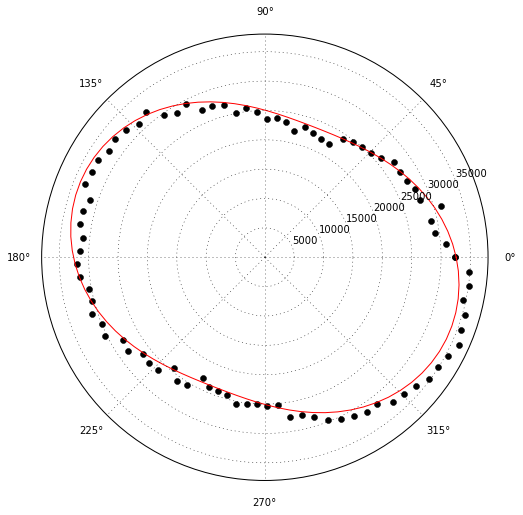

In [2]:
T1 = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW  0.5mW scan 5 x188 y59 rotor sweep 3')
T1[:,1] -= 1550
OrientPol(T1,False)

[ -7.73016586e+00   1.46728943e-02  -1.07236209e+00  -1.65880218e+05
   1.11609504e+03]


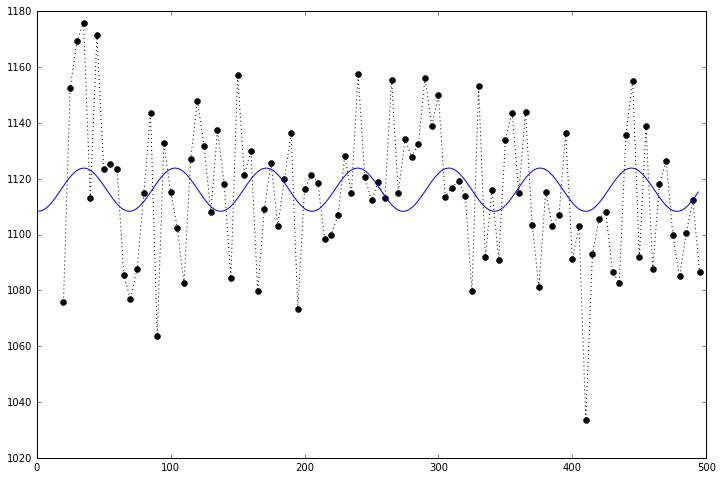

In [8]:
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5 x188 y59 B0.29V t-21 th33 d8.8 -12dbm Rabi *[3-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5 x188 y59 B0.29V t-21 th33 d8.8 -12dbm Rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,1200,900))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  1.14465780e+05   2.00000000e-01  -2.18750983e+02   3.28555519e+01
   1.04290008e+03]


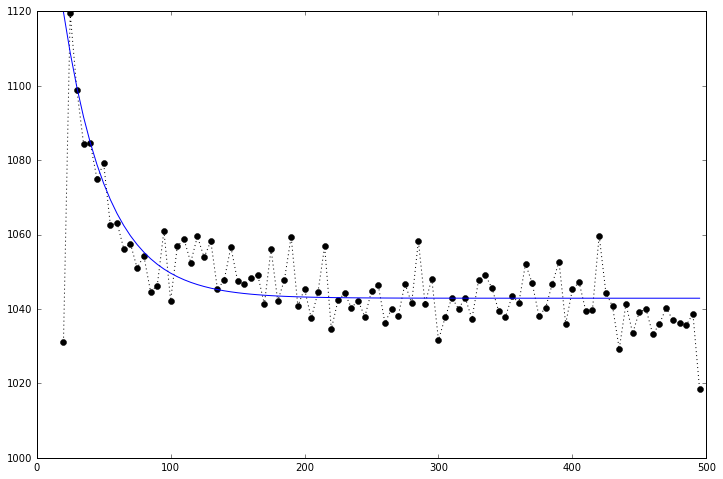

In [12]:
time,rabi0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5 x188 y59 B0.29V t-21 th33 d8.8 -12dbm 3 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5 x188 y59 B0.29V t-21 th33 d8.8 -12dbm Rabi Pulse Seq')
#rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(100,14E-3,0,10,1100))
t = np.arange(0,np.max(time),1)
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')
print opt0

[  1.76066178e+01   4.96343899e+00   4.94219139e+02   5.09599831e+00
   8.44773701e+03]


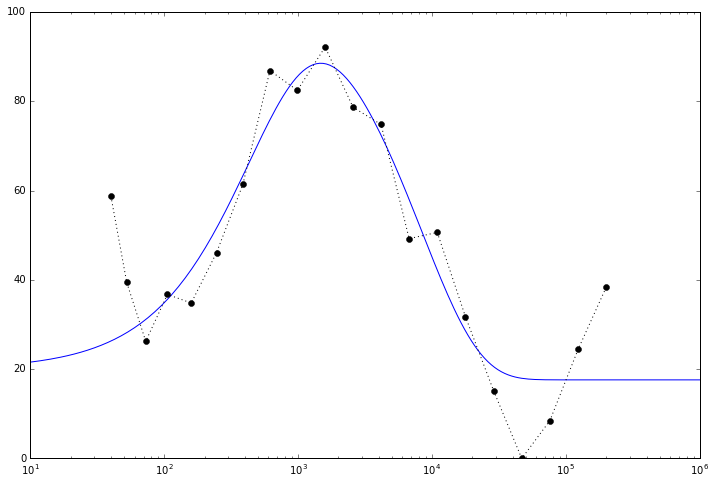

In [4]:
def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))
    
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5  T1  x179 y62 T1 7200 sec*[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5  T1  x179 y62 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

[  6.43126892e+00   1.68121791e+01   2.79242550e+02   1.40798782e+01
   3.58165990e+04]


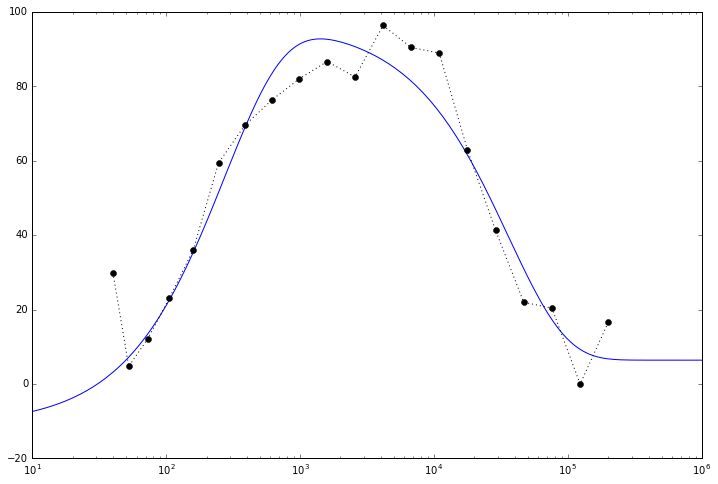

In [37]:
def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))
    
time,T0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5  2 T1   x200 y61 T1 7200 sec*[0-9]',
         r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5  2 T1   x200 y61 T1 7200 sec  Pulse Seq')
time = time+20
T0 = T0 - np.min(T0)
opt0,cov0 = curve_fit(T1Fit,time[1:],T0[1:],maxfev=5500,p0=(0,0.1,200,0.2,1000))
t = np.logspace(1,6,200)
plt.semilogx(t,T1Fit(t,*opt0),'b-')
print opt0
plt.semilogx(time,T0,'ko:')

In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"

Loading BokehJS ...

In [24]:
import pandas as pd
import glob
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\12-19-16\MNP 11-3-C on CPW 0.5mW scan 5  x180 y62 ODMR *V.txt')
output_file("12-19-16 MNP 11-3-c Dot 1 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2.5,len(files))*(10.8/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

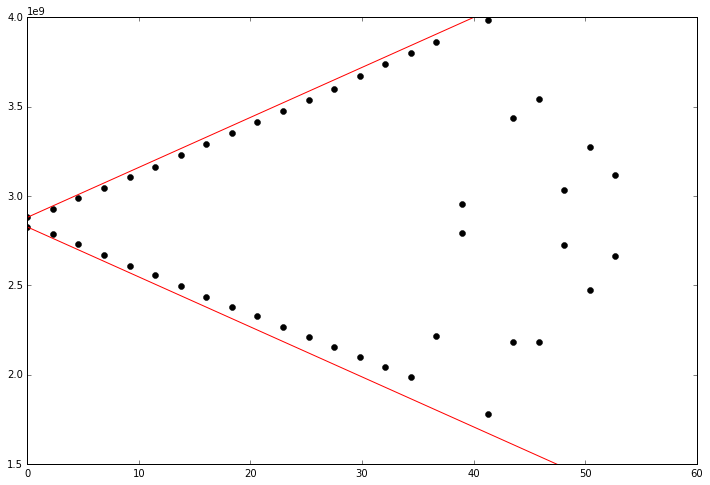

In [28]:
freq = bsweep[:,0]
fits = np.zeros((diffs.shape[1],6))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:] = opt
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
Bs = np.linspace(0,2.5,len(files))*(11/0.5)
plt.plot(Bs,mins,'ko')
plt.plot(Bs,maxs,'ko')
plt.ylim([1.5E9,4E9])
plt.plot(Bs,maxs[0]+28E6*Bs,'r-')
plt.plot(Bs,mins[0]-28E6*Bs,'r-')

10.6648393514
-9.78490929348


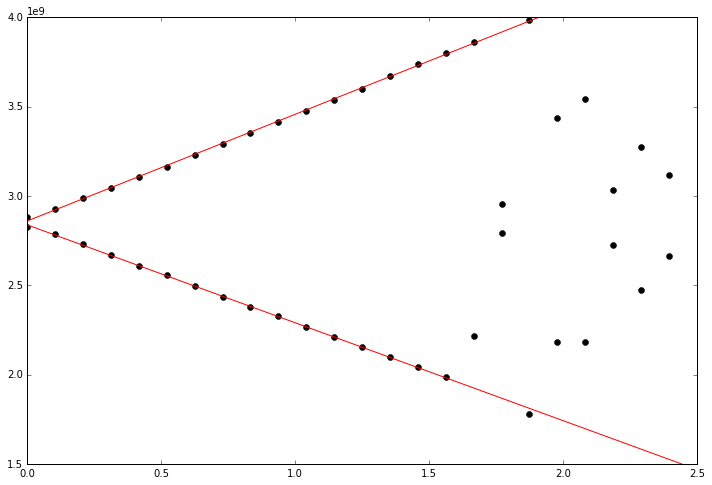

In [36]:
from scipy import stats



v = np.linspace(0,2.5,len(files))
plt.plot(v,mins,'ko')
plt.plot(v,maxs,'ko')
plt.ylim([1.5E9,4E9])
slope, intercept, r_value, p_value, std_err = stats.linregress(v[:17],maxs[:17])
print slope/(2*28E6)
plt.plot(v,intercept+slope*v,'r-')
slope, intercept, r_value, p_value, std_err = stats.linregress(v[:15],mins[:15])
print slope/(2*28E6)
plt.plot(v,intercept+slope*v,'r-')
